In [1]:
#ML to predict fetal health

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn-v0_8-whitegrid')
import scipy.stats as stats 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder ,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif ,f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler ,LabelEncoder
import xgboost as XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
print('complete')

complete


In [3]:
#Let's start by reading the cleaned dataset

df = pd.read_csv("../Data/Clean/cleaned_df_fetal_health.csv")
df.head()

,baseline_value_FHR(BPM),accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,FHR_min,FHR_max,FHR_n_of_peaks,FHR_n_of_zeros,FHR_mode,FHR_mean,FHR_median,FHR_variance,FHR_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [10]:
#Pivot the data to long format (this assumes you want to pivot all columns except the first one)
df_long = pd.melt(df, var_name='Feature Name', value_name='Feature Value')

# Save the pivoted data to a new CSV file
df_long.to_csv('pivoted_data.csv', index=False)

print("Data has been successfully pivoted and saved to 'pivoted_data.csv'")

Data has been successfully pivoted and saved to 'pivoted_data.csv'


In [18]:
df_long_2 = pd.melt(df, id_vars=['fetal_health'], var_name='Feature', value_name='Value')

# Save the pivoted data to a new CSV file
df_long_2.to_csv('pivoted_data_2.csv', index=False)

print("Data has been successfully pivoted and saved to 'pivoted_data.csv'")

# Optional: Check the first few rows of the pivoted DataFrame to confirm
print(df_long_2.head())

Data has been successfully pivoted and saved to 'pivoted_data.csv'
  fetal_health                  Feature  Value
0      Suspect  baseline_value_FHR(BPM)  120.0
1       Normal  baseline_value_FHR(BPM)  132.0
2       Normal  baseline_value_FHR(BPM)  133.0
3       Normal  baseline_value_FHR(BPM)  134.0
4       Normal  baseline_value_FHR(BPM)  132.0


In [7]:
df['fetal_health'].info


<bound method Series.info of 0       Suspect
1        Normal
2        Normal
3        Normal
4        Normal
         ...   
2108    Suspect
2109    Suspect
2110    Suspect
2111    Suspect
2112     Normal
Name: fetal_health, Length: 2113, dtype: object>

,Feature,Chi-Squared Statistic,P-Value,Significant
0,baseline_value_FHR(BPM),586.050503,3.561658e-72,True
1,accelerations,477.510665,2.190655e-77,True
2,fetal_movement,367.426478,9.860056e-12,True
3,uterine_contractions,306.571507,1.338895e-47,True
4,light_decelerations,191.321722,2.054575e-25,True
5,severe_decelerations,55.463456,9.041982e-13,True
6,prolongued_decelerations,735.193087,1.741256e-151,True
7,abnormal_short_term_variability,1051.199529,5.717650e-136,True
8,mean_abnormal_short_term_variability,1092.660469,1.714488e-160,True
9,percentage_of_time_with_abnormal_long_term_var...,1253.518744,1.475029e-163,True


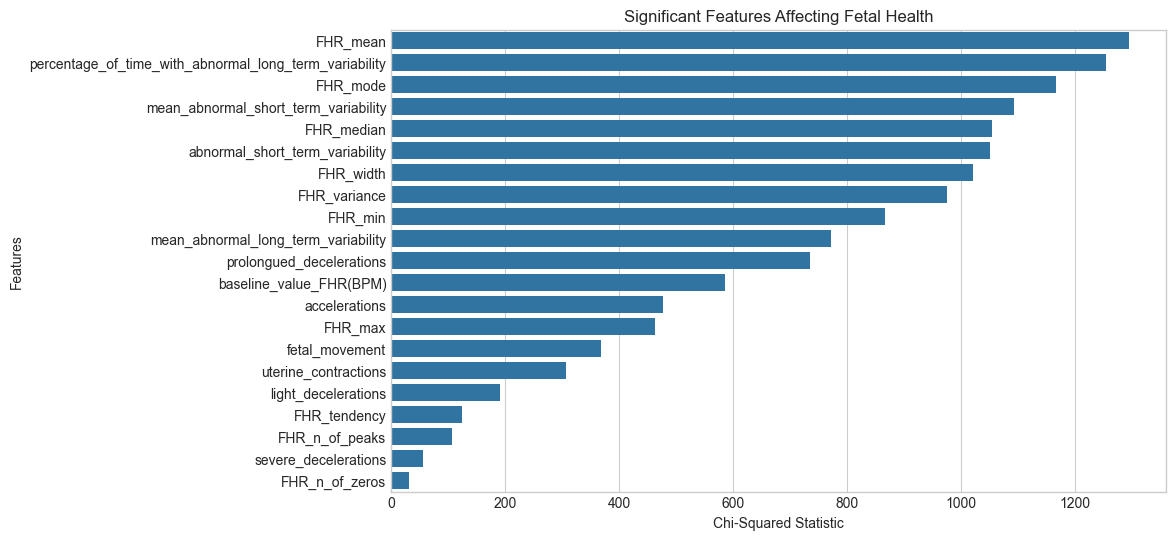

In [12]:

from scipy import stats
from sklearn.feature_selection import chi2


# Initialize lists to store results
results = []

# Loop through each feature to calculate Chi-Squared statistic and p-value
for feature in df.columns:
    if feature != 'fetal_health':
        # Create a contingency table
        contingency_table = pd.crosstab(df[feature], df['fetal_health'])
        
        # Perform Chi-Squared test
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        
        # Store the results
        results.append((feature, chi2_stat, p_value))

# Create a DataFrame to summarize the results
results_df = pd.DataFrame(results, columns=['Feature', 'Chi-Squared Statistic', 'P-Value'])

# Adjusting the significance level
alpha = 0.05
results_df['Significant'] = results_df['P-Value'] < alpha

# Display the results DataFrame
display(results_df)

# Optional: You can also visualize the significant features
significant_features = results_df[results_df['Significant']]

# Create a bar plot of significant features
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Squared Statistic', y='Feature', data=significant_features.sort_values(by='Chi-Squared Statistic', ascending=False))
plt.title('Significant Features Affecting Fetal Health')
plt.xlabel('Chi-Squared Statistic')
plt.ylabel('Features')
plt.show()

# Save the results DataFrame to a CSV file
results_df.to_csv('fetal_health_chi_squared_results.csv', index=False)

In [31]:
df.columns

Index(['baseline_value_FHR(BPM)', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_abnormal_long_term_variability', 'FHR_width', 'FHR_min',
       'FHR_max', 'FHR_n_of_peaks', 'FHR_n_of_zeros', 'FHR_mode', 'FHR_mean',
       'FHR_median', 'FHR_variance', 'FHR_tendency', 'fetal_health'],
      dtype='object')

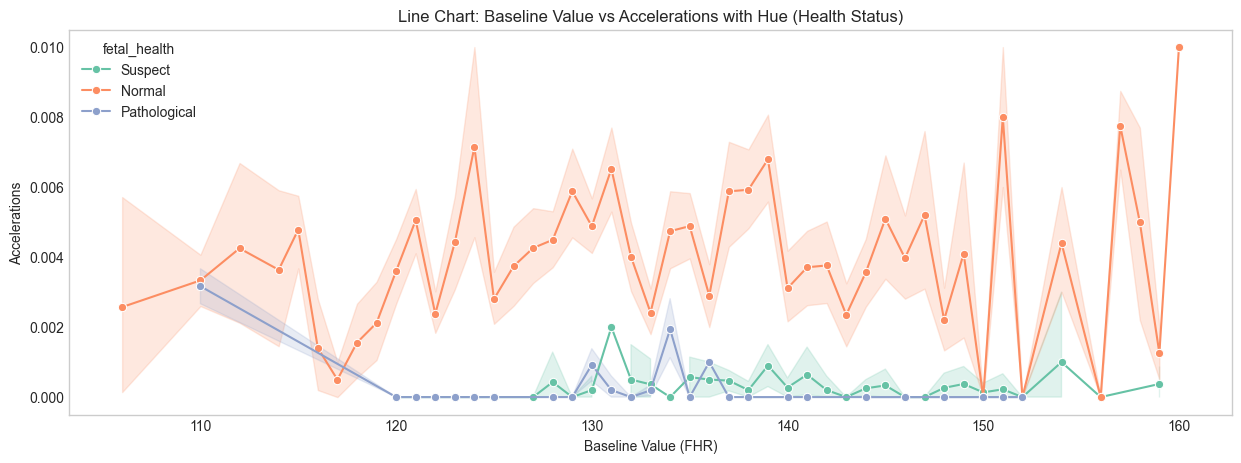

In [35]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='baseline_value_FHR(BPM)', y='accelerations', hue='fetal_health', data=df, marker='o', palette='Set2')
plt.title('Line Chart: Baseline Value vs Accelerations with Hue (Health Status)')
plt.xlabel('Baseline Value (FHR)')
plt.ylabel('Accelerations')
plt.grid(False)

plt.show()